# PubFL - Censorship-Resistant Federated Learning on Public Blockchains
### by Anton Wahrstätter, Sajjad Khan & Davor Svetinovic

## CIFAR-10 DATASET GANACHE SIMULATION

### Contents
* [Experiment](#Deploy-Challenger-Contract-and-Start-Experiment)
* [Visualization](#Visualize-Experiment)
* [Individual Transactions](#Transactions)
* [Contracts and Participants](#Contracts-and-Paricipants-(Latex-format))
* [Gas Costs](#Table-with-Gas-Info-(Latex-format))

### Imports
The imports consist of the following:
* PytorchModel - which is the wrapper for the Convolutional Network
* FLManager - the wrapper for the Manager contract
* FLChallenge - the wrapper for the Challenge contract

In [1]:
from pytorch_model import PytorchModel
from smartcontracts import FLManager, FLChallenge

### Select data set

In [2]:
DATASET = "cifar-10"
#DATASET = "mnist"

### RPC Provider

The RPC provides the connection to the respective blockchain, for example Ethereum or the Robsten testnet.

In [3]:
with open("rpc_endpoint.txt", "r") as file:
    RPC_ENDPOINT = file.read()

### Configurations

In [4]:
NUMBER_OF_GOOD_CONTRIBUTORS = 6
NUMBER_OF_BAD_CONTRIBUTORS = 1
NUMBER_OF_FREERIDER_CONTRIBUTORS = 1
NUMBER_OF_INACTIVE_CONTRIBUTORS = 0

REWARD = int(1e18)
MINIMUM_ROUNDS = 25
MIN_BUY_IN = int(1e18)
MAX_BUY_IN = int(1.8e18)
STANDARD_BUY_IN = int(1e18)
EPOCHES = 25
BATCH_SIZE = 128
PUNISHFACTOR = 3
FIRST_ROUND_FEE = 50 # 20% OF MIN DEPOSIT

FORK = True # Fork Chain or communicate directly with RPC

NUMBER_OF_CONTRIBUTERS = NUMBER_OF_GOOD_CONTRIBUTORS      + \
                         NUMBER_OF_BAD_CONTRIBUTORS       + \
                         NUMBER_OF_FREERIDER_CONTRIBUTORS + \
                         NUMBER_OF_INACTIVE_CONTRIBUTORS

In [5]:
# Only for the real-net simulation
# In order to use a non-locally forked blockchain, 
# private keys are required to unlock accounts
if FORK == False:
    from web3 import Web3
    w3 = Web3(Web3.HTTPProvider(RPC_ENDPOINT))
    PRIVKEYS = []
    with open("private_keys.txt", "r") as file:
        for f in file:
            PRIVKEYS.append(f.split(":")[0])

    PRIVKEYS = [w3.eth.account.privateKeyToAccount(i) for i in PRIVKEYS]
else:
    PRIVKEYS = None

### Initialized Deep Learning Model and add Participants

In [6]:
pytorch_model = PytorchModel(DATASET, 
                             NUMBER_OF_GOOD_CONTRIBUTORS, 
                             NUMBER_OF_CONTRIBUTERS, 
                             EPOCHES, 
                             BATCH_SIZE, 
                             STANDARD_BUY_IN,
                             MAX_BUY_IN)


for i in range(NUMBER_OF_BAD_CONTRIBUTORS):
    pytorch_model.add_participant("bad",3)

for i in range(NUMBER_OF_FREERIDER_CONTRIBUTORS):
    pytorch_model.add_participant("freerider",1)
    
for i in range(NUMBER_OF_INACTIVE_CONTRIBUTORS):
    pytorch_model.add_participant("inactive",1)

Data Loaded:
Nr. of images for training: 50,000
Nr. of images for testing:  10,000

Pytorch Model created:

Net_CIFAR(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Good User
Participant added: Bad User
Participant added: Freerider User


### Initialize and Deploy Manager Contract

In [7]:
manager = FLManager(pytorch_model, True).init(NUMBER_OF_GOOD_CONTRIBUTORS, 
                                              NUMBER_OF_BAD_CONTRIBUTORS,
                                              NUMBER_OF_FREERIDER_CONTRIBUTORS,
                                              NUMBER_OF_INACTIVE_CONTRIBUTORS,
                                              MINIMUM_ROUNDS,
                                              RPC_ENDPOINT,
                                              FORK,
                                              PRIVKEYS)
manager.buildContract()

Connected to Ethereum: True
initiated Ganache-Client @ Block Nr. 12,582,380

Total Contributers:       8
Good Contributers:        6 (75%)
Malicious Contributers:   1 (12%)
Freeriding Contributers:  1 (12%)
Inactive Contributers:    0 (0%)
Learning Rounds:          25
-----------------------------------------------------------------------------------
Account initiated @ Address 0xB7B52C5A50fa8cB36344E79... with 1,000.0 ETH | FAIR USER
Account initiated @ Address 0xF28Ab1010e5f846AA00b8E1... with 1,000.0 ETH | FAIR USER
Account initiated @ Address 0x85C2d80777d6fCfABF2C95B... with 1,000.0 ETH | FAIR USER
Account initiated @ Address 0x8Cb13a2351C27116aAD3D40... with 1,000.0 ETH | FAIR USER
Account initiated @ Address 0x6F245DC2608Ec108158FcDC... with 1,000.0 ETH | FAIR USER
Account initiated @ Address 0x2d5fcDFe0F48f951e69E8C8... with 1,000.0 ETH | FAIR USER
Account initiated @ Address 0xC8eC1dc70807303D9AD5762... with 1,000.0 ETH | MAL. USER
Account initiated @ Address 0xB29bd16bcE85A36

### Deploy Challenger Contract and Start Experiment

In [8]:
configs = manager.deployChallengeContract(MIN_BUY_IN,
                                          MAX_BUY_IN,
                                          REWARD, 
                                          MINIMUM_ROUNDS,
                                          PUNISHFACTOR,
                                          FIRST_ROUND_FEE)

model = FLChallenge(manager, 
                    configs,
                    pytorch_model)


model.simulate(rounds=MINIMUM_ROUNDS)

Starting simulation...
-----------------------------------------------------------------------------------

Model deployed    @ Address 0x0bf933d5ab9CB71587e1D4B2BE6DD121f7445aD9 | 0x379c...

-----------------------------------------------------------------------------------
Account registered: 0xB7B52C5A50fa8c... | 0x379c... | 1,000,000,000,000,000,000 WEI
Account registered: 0xF28Ab1010e5f84... | 0xe0e0... | 1,100,000,000,000,000,000 WEI
Account registered: 0x85C2d80777d6fC... | 0x352f... | 1,200,000,000,000,000,000 WEI
Account registered: 0x8Cb13a2351C271... | 0x303e... | 1,300,000,000,000,000,000 WEI
Account registered: 0x6F245DC2608Ec1... | 0x17d4... | 1,400,000,000,000,000,000 WEI
Account registered: 0x2d5fcDFe0F48f9... | 0x94a1... | 1,500,000,000,000,000,000 WEI
Account registered: 0xC8eC1dc7080730... | 0x8789... | 1,600,000,000,000,000,000 WEI
Account registered: 0xB29bd16bcE85A3... | 0x5f02... | 1,700,000,000,000,000,000 WEI
----------------------------------------------------

### Visualize Experiment 

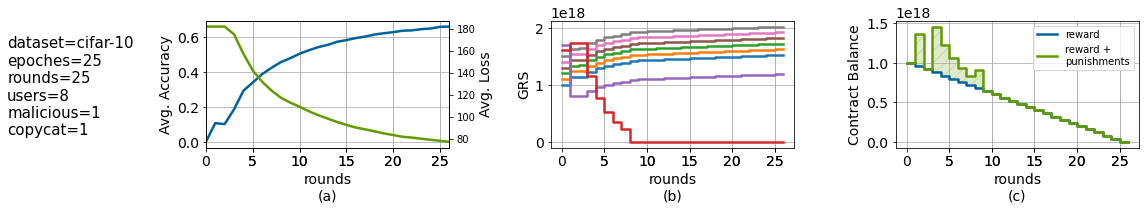

In [9]:
model.visualize_simulation()

### Transactions

In [10]:
print("{:<10} - {:^64} -    Gas Used - {}".format("Function", "Transaction Hash", "Success"))
print("------------------------------------------------------------------------------------------")
for f, txhash in model.txHashes:
    r = model.w3.eth.waitForTransactionReceipt(txhash)
    if r["status"] == 1:
        success = "✅"
    else:
        success = "FAIL"
    
    gas = r["gasUsed"]
    print("{:<10} - {} - {:>9,.0f} -   {}".format(f, txhash, gas, success))

Function   -                         Transaction Hash                         -    Gas Used - Success
------------------------------------------------------------------------------------------
register   - 0xe0e035f545b20d0c18e8c7617f4c8d1d74c7599206d76ff5ea2947948b5ab37c -   127,396 -   ✅
register   - 0x352ffe9576d321d9883e99d08efa68be481505a4ad8672df181d030736084265 -   127,396 -   ✅
register   - 0x303e6c359aa134f1083267a665c25b261dee6c0c17492b14d9a42131077727b6 -   127,396 -   ✅
register   - 0x17d40d525a35c304921e8e5c891365c9be484794547fe0cf16b6fd78a7816a87 -   127,396 -   ✅
register   - 0x94a16f29b8eab0dc00d0357c3b4a0fbd2793eece7697a559ab8ff68670c1d3ee -   127,396 -   ✅
register   - 0x87893ddd9674ab9af96637c661f1bdc1ff38fe4b4fd522ef53c48a5f34d0fa81 -   127,396 -   ✅
register   - 0x5f0217424c581237a8784dba5df9f5bf64649b92b457952998dc7a5ae93435da -   127,396 -   ✅
slot       - 0x1cc0a76c814a6fdf8c77ac274e3184adbabe34ba8eed2ebc2cbf27ae4a80df17 -    51,185 -   ✅
slot       - 0x3f8a7a36

### Contracts and Paricipants (Latex format)

In [11]:
print("\\renewcommand{\\arraystretch}{1.3}")
print("\\begin{center}")
print("\\begin{tabular}{ c|c }")

print("Contract & Address (Ropsten Testnet) \\\ ")
print("\\hline")
print("Ma-1 & {} \\\ ".format(manager.manager.address))
print("Ch-1 & {} \\\ ".format(model.model.address))
for i, p in enumerate(model.pytorch_model.participants[:-1] + \
                           model.pytorch_model.disqualified + \
                           [model.pytorch_model.participants[-1]]):
    print("P-{}  & {} \\\ ".format(i+1, p.address))

print("\\end{tabular}")
print("\\end{center}")

\renewcommand{\arraystretch}{1.3}
\begin{center}
\begin{tabular}{ c|c }
Contract & Address (Ropsten Testnet) \\ 
\hline
Ma-1 & 0x1dC57F567Cb5794559588BC06053abE6fB7FBfEe \\ 
Ch-1 & 0x0bf933d5ab9CB71587e1D4B2BE6DD121f7445aD9 \\ 
P-1  & 0xB7B52C5A50fa8cB36344E7956d680706421533f7 \\ 
P-2  & 0xF28Ab1010e5f846AA00b8E10cac8d6B2Ad786F8F \\ 
P-3  & 0x85C2d80777d6fCfABF2C95BF16508D060Fc8C7a5 \\ 
P-4  & 0x8Cb13a2351C27116aAD3D40Acd17f2651567592D \\ 
P-5  & 0x6F245DC2608Ec108158FcDCe8317455A4815bc1b \\ 
P-6  & 0x2d5fcDFe0F48f951e69E8C84705FcF9B28978067 \\ 
P-7  & 0xC8eC1dc70807303D9AD57621E48a2e7307DD44b5 \\ 
P-8  & 0xB29bd16bcE85A36394F0093576AD0b8e6E682cCE \\ 
\end{tabular}
\end{center}


### Table with Gas Info (Latex format)

In [12]:
reg = model.gas_register, "register"
fed = model.gas_feedback, "feedback"
clo = model.gas_close, "settle round"
slo = model.gas_slot, "reserve slot"
wei = model.gas_weights, "provide weights**"
dep = manager.gas_deploy, "deployment"
dep = manager.gas_deploy, "deployment"
ext = model.gas_exit, "exit"

tot  = 0
tot2 = 0

print("\\begin{tabular}{ |c|c|c| }\n\hline\nFunction & Gas Amount & Gas Costs*\\\ \n\hline")
for i, f in [reg,slo,wei,fed,clo]:
    print("{} & {:,.0f} & {:.5f} ETH \\\ ".format(f, sum(i)/len(i), sum(i)/len(i) * 20e9 / 1e18 ))
    tot += sum(i)/len(i)
    if i != clo[0]:
            tot2 += sum(i)/len(i)
        
print("\hline\n\hline")
print("complete round & {:,.0f} & {:.5f} \\\ ".format(tot, tot * 20e9 / 1e18))
print("\hline\n\end{tabular}")

\begin{tabular}{ |c|c|c| }
\hline
Function & Gas Amount & Gas Costs*\\ 
\hline
register & 127,396 & 0.00255 ETH \\ 
reserve slot & 51,183 & 0.00102 ETH \\ 
provide weights** & 59,916 & 0.00120 ETH \\ 
feedback & 309,691 & 0.00619 ETH \\ 
settle round & 693,179 & 0.01386 ETH \\ 
\hline
\hline
complete round & 1,241,366 & 0.02483 \\ 
\hline
\end{tabular}
